Hey there, welcome to my notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#importing dataset
dataset = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Looking for null values
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


The data does not contain any null values

In [5]:
dataset.shape

(21613, 21)

In [6]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


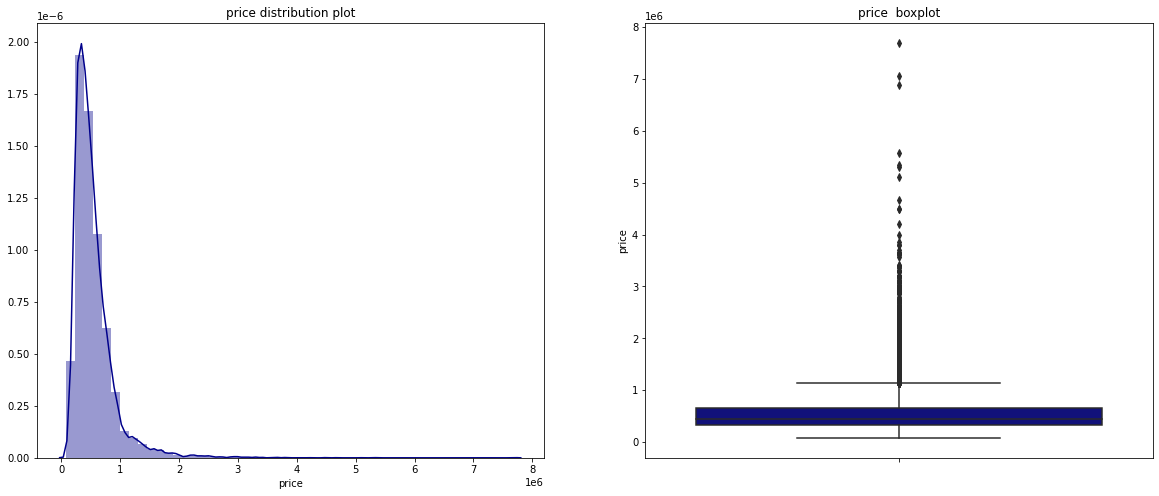

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('price distribution plot')
sb.distplot(dataset.price,color ='darkblue')

plt.subplot(1,2,2)
plt.title('price  boxplot')
ax = sb.boxplot(y = dataset.price ,color = 'darkblue' )


plt.show()

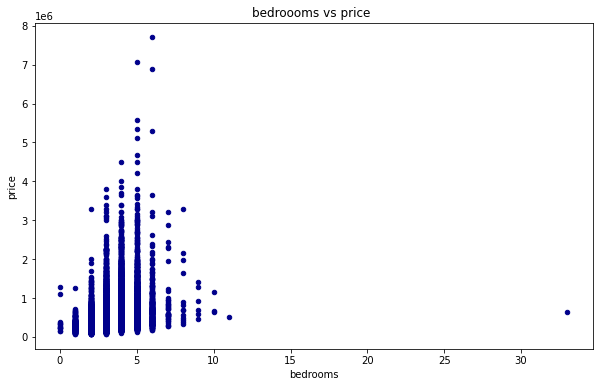

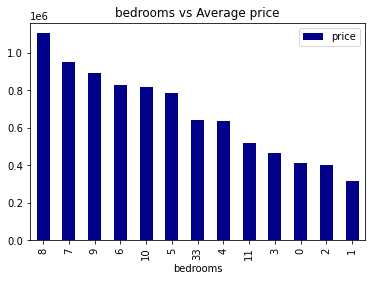

In [8]:

#scatterplot
dataset.plot(kind='scatter', x='bedrooms', y='price', figsize=(10, 6), color='darkblue')
plt.title('bedroooms vs price ')
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.show()

#barplot
df = pd.DataFrame(dataset.groupby(['bedrooms'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color = 'darkblue')
plt.title('bedrooms vs Average price')
plt.show()


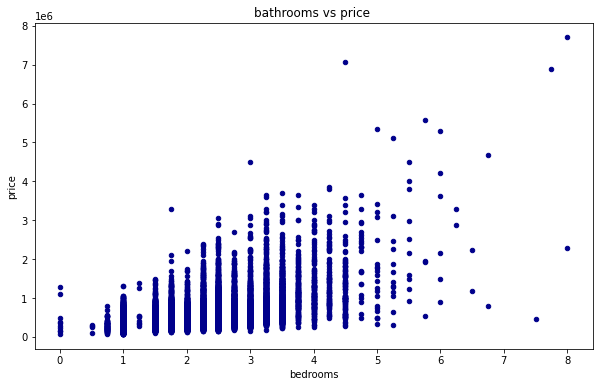

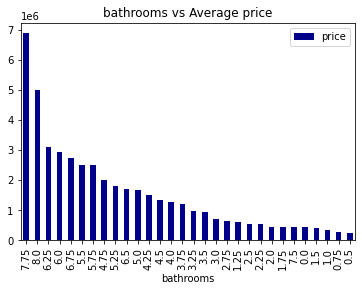

In [9]:
#scatterplot
dataset.plot(kind='scatter', x='bathrooms', y='price', figsize=(10, 6), color='darkblue')
plt.title('bathrooms vs price ')
plt.xlabel('bedrooms')
plt.ylabel('price')

plt.show()

#barplot
df = pd.DataFrame(dataset.groupby(['bathrooms'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color = 'darkblue')
plt.title('bathrooms vs Average price')
plt.show()

In [10]:
x = dataset['sqft_living']      # year on x-axis
y = dataset['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([   280.6235679 , -43580.74309447])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements ([   280.6235679 , -43580.74309447])  with the the slope in position 0 and intercept in position 1.

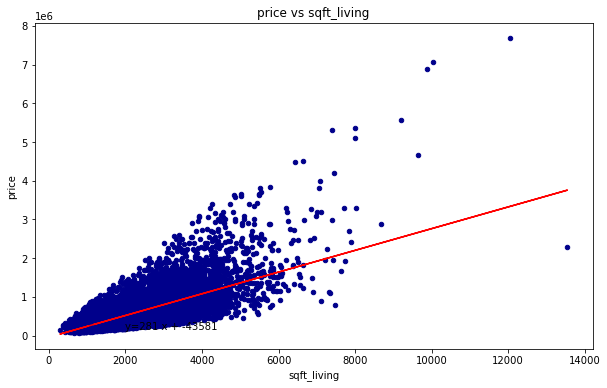

'price = 281 * sqft_living + -43581'

In [11]:

#plotting scatterplot


dataset.plot(kind='scatter', x ='sqft_living', y ='price', figsize=(10, 6), color='darkblue')

plt.title('price vs sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')

# plot line of best fit

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'price = {0:.0f} * sqft_living + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the price for any value of sqft_living by just putting the value and solving for it


In [12]:
x = dataset['sqft_lot']      # year on x-axis
y = dataset['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([7.94701446e-01, 5.28082613e+05])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements ([7.94701446e-01, 5.28082613e+05]) with the the slope in position 0 and intercept in position 1.

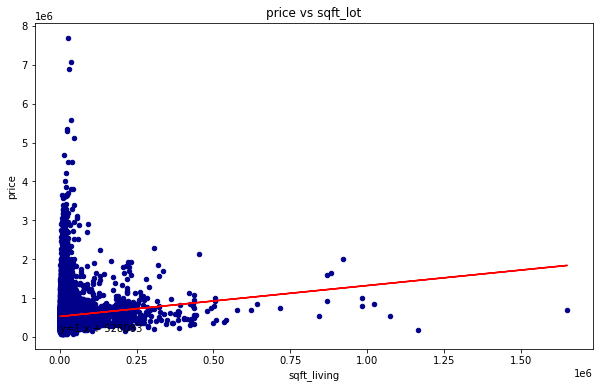

'price = 1 * sqft_lot + 528083'

In [13]:
#plotting scatterplot


dataset.plot(kind='scatter', x ='sqft_lot', y ='price', figsize=(10, 6), color='darkblue')

plt.title('price vs sqft_lot')
plt.xlabel('sqft_living')
plt.ylabel('price')

# plot line of best fit

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'price = {0:.0f} * sqft_lot + {1:.0f}'.format(fit[0], fit[1]) 

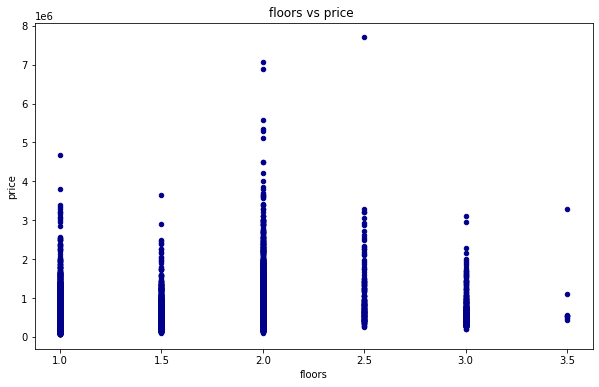

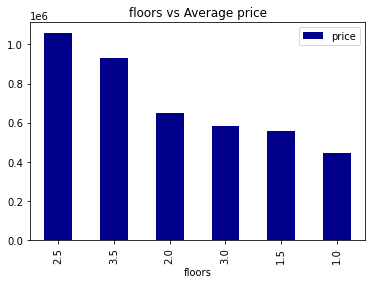

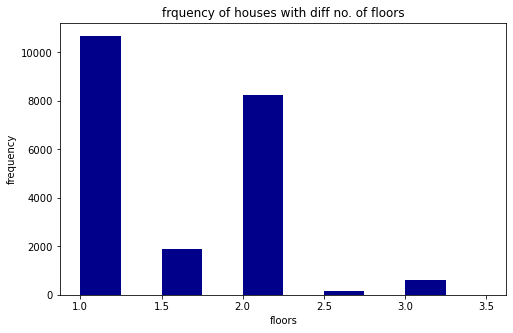

In [14]:
#scatterplot
dataset.plot(kind='scatter', x='floors', y='price', figsize=(10, 6), color='darkblue')
plt.title('floors vs price ')
plt.xlabel('floors')
plt.ylabel('price')

plt.show()

#barplot
df = pd.DataFrame(dataset.groupby(['floors'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color = 'darkblue')
plt.title('floors vs Average price')
plt.show()

#histogram_for_frequency
# np.histogram returns 2 values
count, bin_edges = np.histogram(dataset['floors'])

dataset['floors'].plot(kind='hist', figsize=(8, 5),color = 'darkblue')


plt.title('frquency of houses with diff no. of floors') # add a title to the histogram
plt.ylabel('frequency') # add y-label
plt.xlabel('floors') # add x-label

plt.show()



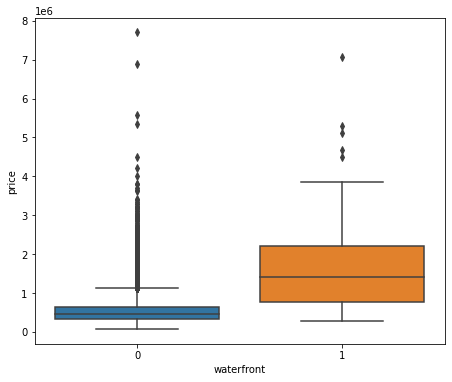

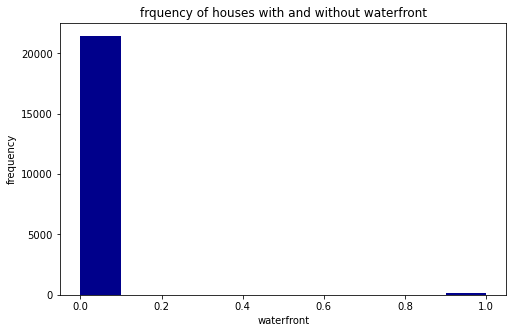

In [15]:
plt.figure(figsize=(25, 6))


plt.subplot(1,3,1)
#boxplot to calculate range of houses with and without waterfront
sb.boxplot(x=dataset['waterfront'],y=dataset['price'])
plt.show()

plt.subplot(1,1,1)
#histogram_for_frequency
# np.histogram returns 2 values
count, bin_edges = np.histogram(dataset['waterfront'])
dataset['waterfront'].plot(kind='hist', figsize=(8, 5),color = 'darkblue')
plt.title('frquency of houses with and without waterfront') # add a title to the histogram
plt.ylabel('frequency') # add y-label
plt.xlabel('waterfront') # add x-label

plt.show()

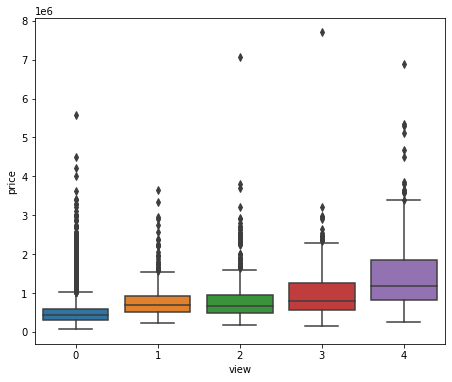

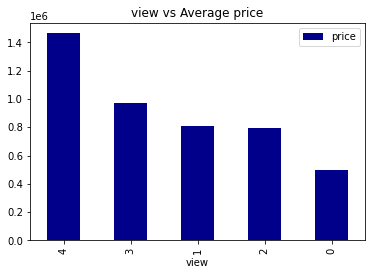

In [16]:
plt.figure(figsize=(25, 6))


plt.subplot(1,3,1)
#boxplot to calculate range of houses with and without waterfront
sb.boxplot(x=dataset['view'],y=dataset['price'])
plt.show()

#plt.subplot(1,3,2)
#barplot
df = pd.DataFrame(dataset.groupby(['view'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color = 'darkblue')
plt.title('view vs Average price')
plt.show()



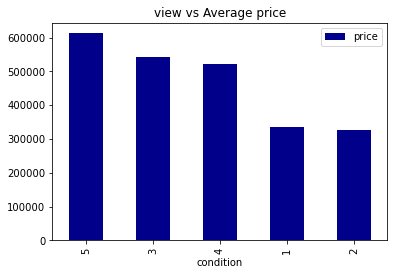

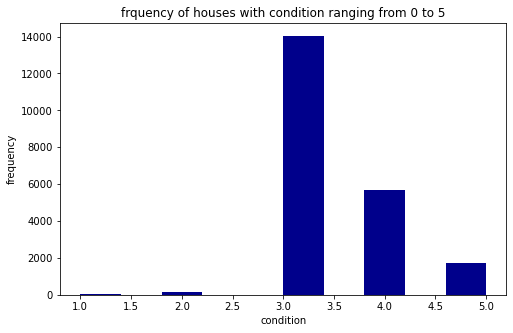

In [17]:
#scatterplot
#barplot
df = pd.DataFrame(dataset.groupby(['condition'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color = 'darkblue')
plt.title('view vs Average price')
plt.show()



#histogram_for_frequency
# np.histogram returns 2 values
count, bin_edges = np.histogram(dataset['condition'])
dataset['condition'].plot(kind='hist', figsize=(8, 5),color = 'darkblue')
plt.title('frquency of houses with condition ranging from 0 to 5') # add a title to the histogram
plt.ylabel('frequency') # add y-label
plt.xlabel('condition') # add x-label

plt.show()


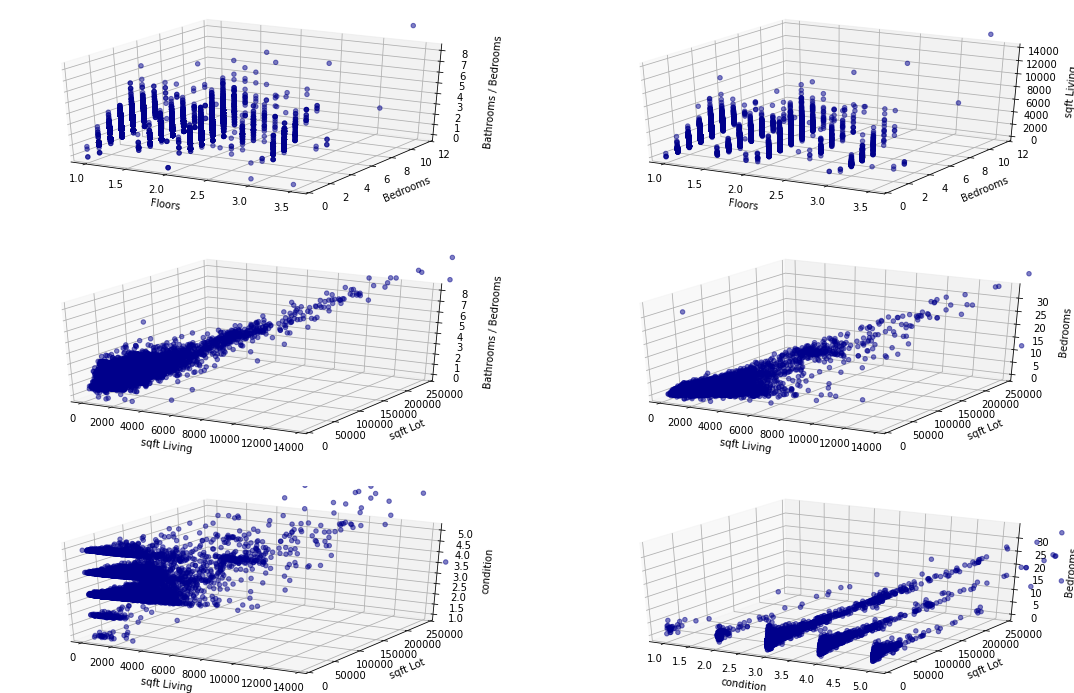

In [18]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(3,2,1, projection="3d")
ax.scatter(dataset['floors'],dataset['bedrooms'],dataset['bathrooms'],c="darkblue",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(3,2,2, projection="3d")
ax.scatter(dataset['floors'],dataset['bedrooms'],dataset['sqft_living'],c="darkblue",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(3,2,3, projection="3d")
ax.scatter(dataset['sqft_living'],dataset['sqft_lot'],dataset['bathrooms'],c="darkblue",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(3,2,4, projection="3d")
ax.scatter(dataset['sqft_living'],dataset['sqft_lot'],dataset['bedrooms'],c="darkblue",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

ax=fig.add_subplot(3,2,5, projection="3d")
ax.scatter(dataset['sqft_living'],dataset['sqft_lot'],dataset['condition'],c="darkblue",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='condition')
ax.set(ylim=[0,250000]);



ax=fig.add_subplot(3,2,6, projection="3d")
ax.scatter(dataset['condition'],dataset['sqft_lot'],dataset['bedrooms'],c="darkblue",alpha=.5)
ax.set(xlabel='\ncondition',ylabel='\nsqft Lot',zlabel='\nBedrooms')
ax.set(ylim=[0,250000]);




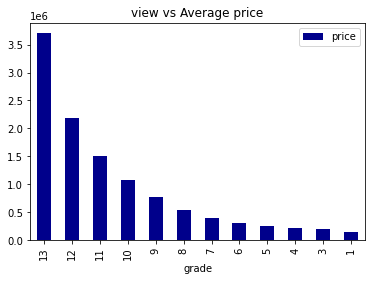

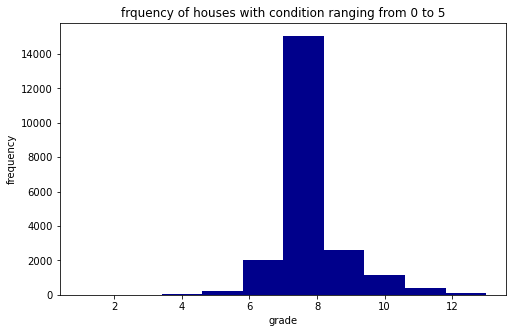

In [19]:
#scatterplot
#barplot
df = pd.DataFrame(dataset.groupby(['grade'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color = 'darkblue')
plt.title('view vs Average price')
plt.show()



#histogram_for_frequency
# np.histogram returns 2 values
count, bin_edges = np.histogram(dataset['grade'])
dataset['grade'].plot(kind='hist', figsize=(8, 5),color = 'darkblue')
plt.title('frquency of houses with condition ranging from 0 to 5') # add a title to the histogram
plt.ylabel('frequency') # add y-label
plt.xlabel('grade') # add x-label

plt.show()

In [20]:
x = dataset['sqft_above']      # year on x-axis
y = dataset['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([  268.47318776, 59953.192047  ])

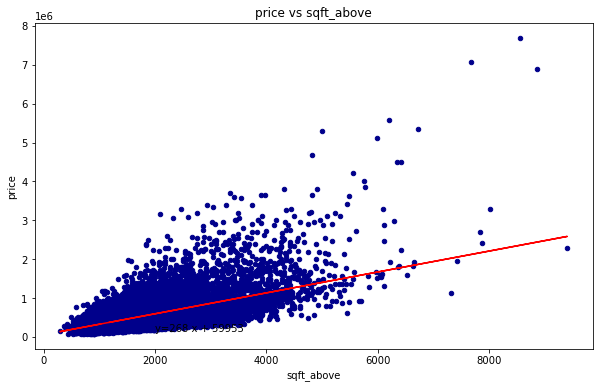

'price = 268 * sqft_above + 59953'

In [21]:
#plotting scatterplot


dataset.plot(kind='scatter', x ='sqft_above', y ='price', figsize=(10, 6), color='darkblue')

plt.title('price vs sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('price')

# plot line of best fit

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'price = {0:.0f} * sqft_above + {1:.0f}'.format(fit[0], fit[1]) 

In [22]:
x = dataset['sqft_basement']      # year on x-axis
y = dataset['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([2.68613583e+02, 4.61784853e+05])

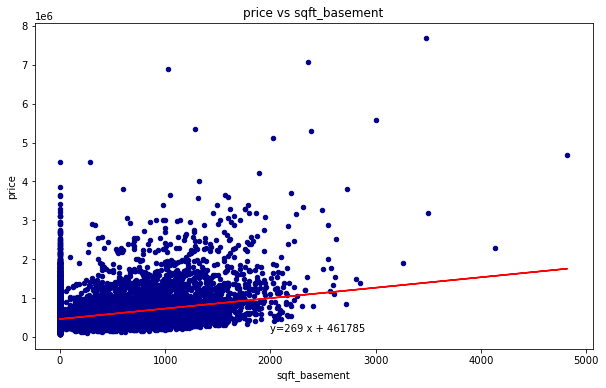

'price = 269 * sqft_basement + 461785'

In [23]:
#plotting scatterplot


dataset.plot(kind='scatter', x ='sqft_basement', y ='price', figsize=(10, 6), color='darkblue')

plt.title('price vs sqft_basement')
plt.xlabel('sqft_basement')
plt.ylabel('price')

# plot line of best fit

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'price = {0:.0f} * sqft_basement + {1:.0f}'.format(fit[0], fit[1]) 

[(0.0, 25000.0)]

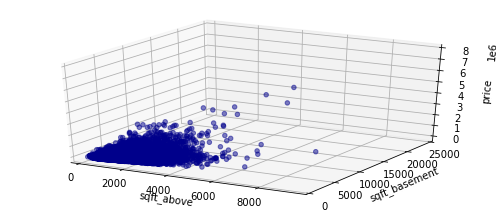

In [24]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(3,2,1, projection="3d")
ax.scatter(dataset['sqft_above'],dataset['sqft_basement'],dataset['price'],c="darkblue",alpha=.5)
ax.set(xlabel='sqft_above',ylabel='sqft_basement',zlabel='price')
ax.set(ylim=[0,25000])

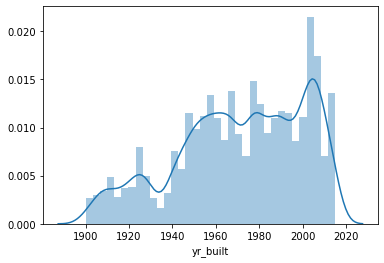

In [25]:
sb.distplot(dataset['yr_built'])


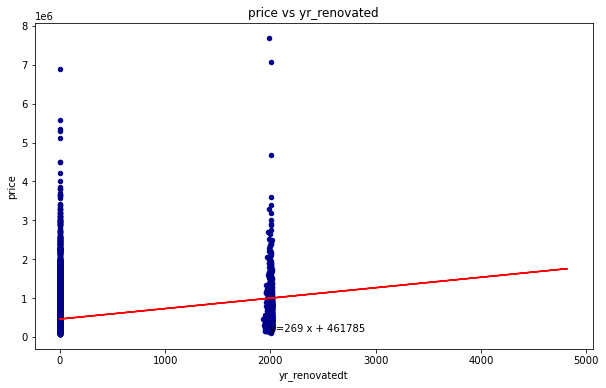

'price = 269 * yr_renovated + 461785'

In [26]:

dataset.plot(kind='scatter', x ='yr_renovated', y ='price', figsize=(10, 6), color='darkblue')

plt.title('price vs yr_renovated')
plt.xlabel('yr_renovatedt')
plt.ylabel('price')

# plot line of best fit

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'price = {0:.0f} * yr_renovated + {1:.0f}'.format(fit[0], fit[1]) 

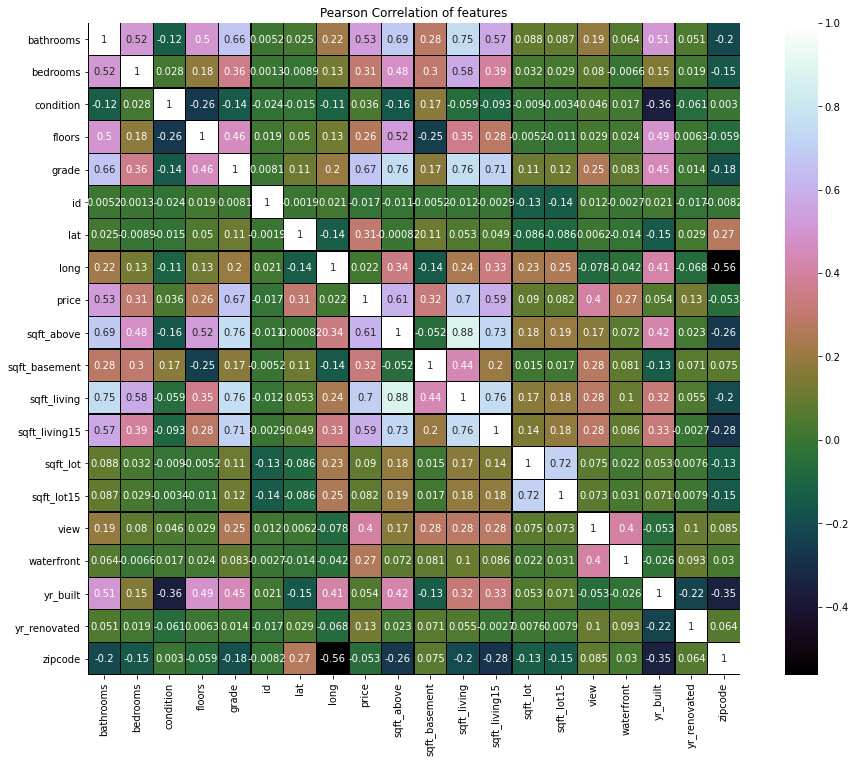

In [27]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in dataset.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = dataset.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = dataset[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sb.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [28]:
dataset.drop(['id', 'date','long','zipcode'], axis = 1, inplace = True)
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,6210.000000,871200.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

train_data, test_data = train_test_split(dataset, train_size =0.8, random_state = 3)

features1 = ['bedrooms','bathrooms','sqft_living','sqft_above','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']


polyfeat = PolynomialFeatures(degree =2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Polynomial Regression 2 ')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Polynomial Regression 2 
Mean Squared Error (MSE)  176473.3
R-squared (training)  0.749
R-squared (testing)  0.757


In [30]:
print('Polynomial Regression 3')

polyfeat = PolynomialFeatures(degree =3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)


mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Polynomial Regression 3
Mean Squared Error (MSE)  185912.6
R-squared (training)  0.792
R-squared (testing)  0.731


In [31]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=20)
knnreg.fit(train_data[features1],train_data['price'])
pred = knnreg.predict(test_data[features1])



mean_squared_error = metrics.mean_squared_error(test_data['price'], pred)


print('KNN regression')
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training)',float(format(knnreg.score(train_data[features1],train_data['price']),'.3f')))
print('R-squared(testing)', float(format(knnreg.score(test_data[features1],test_data['price']),'.3f')))
# print('adjusted R-squared(training)',float(format(adjustedR2(knnreg.score(train_data[features1],train_data['Price']),test_data.shape[0],len(features1)),'.3f')))

# print('adjusted R-squared(testing)',float(format(adjustedR2(knnreg.score(test_data[features1],test_data['Price']),test_data.shape[0],len(features1)),'.3f')))



KNN regression
Mean Squared Error (MSE)  242840.05
R-squared (training) 0.598
R-squared(testing) 0.541


In [32]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(train_data[features1],train_data['price'])
pred = svr.predict(test_data[features1])
print('SVR')
mean_squared_error = metrics.mean_squared_error(test_data['price'], pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training)',float(format(svr.score(train_data[features1],train_data['price']),'.3f')))
print('R-squared(testing)', float(format(svr.score(test_data[features1],test_data['price']),'.3f')))

SVR
Mean Squared Error (MSE)  368469.83
R-squared (training) -0.055
R-squared(testing) -0.058


In [33]:

# Fitting the random forest regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300 , random_state = 0)
regressor.fit(train_data[features1],train_data['price'])
# Predicting a new result
pred = regressor.predict(test_data[features1])
print('Random Forest Regression')
mean_squared_error = metrics.mean_squared_error(test_data['price'], pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training)',float(format(regressor.score(train_data[features1],train_data['price']),'.3f')))
print('R-squared(testing)', float(format(regressor.score(test_data[features1],test_data['price']),'.3f')))

Random Forest Regression
Mean Squared Error (MSE)  155607.51
R-squared (training) 0.974
R-squared(testing) 0.811


In [34]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(train_data[features1],train_data['price'])

# Predicting a new result
pred = regressor.predict(test_data[features1])

print('Decision Tree Regression')
mean_squared_error = metrics.mean_squared_error(test_data['price'], pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training)',float(format(regressor.score(train_data[features1],train_data['price']),'.3f')))
print('R-squared(testing)', float(format(regressor.score(test_data[features1],test_data['price']),'.3f')))

Decision Tree Regression
Mean Squared Error (MSE)  219148.25
R-squared (training) 0.999
R-squared(testing) 0.626
